<a href="https://colab.research.google.com/github/dsdayat/Data-Visualization-Pyhton/blob/main/HWDay10_Agus_Nur_Hidayat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment

In [149]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('train.csv')

In [52]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [54]:
df.shape

(1460, 81)

untuk max rows biar keliatan datanya semua

In [163]:
pd.set_option('display.max_rows',1460)

In [167]:
pd.set_option('display.max_columns',82)

In [166]:
df.shape

(1460, 82)

In [56]:
df['totalnull']=df.isna().sum()

#Cek Persentase Missing Value keseluruhan

In [57]:
p =pd.DataFrame(df.isna().sum().sort_values(),columns=['totalnull'])
p['Percentage']=p['totalnull']/df.shape[0]*100
print(p)

               totalnull  Percentage
Id                     0    0.000000
KitchenAbvGr           0    0.000000
BedroomAbvGr           0    0.000000
HalfBath               0    0.000000
FullBath               0    0.000000
BsmtHalfBath           0    0.000000
BsmtFullBath           0    0.000000
KitchenQual            0    0.000000
GrLivArea              0    0.000000
2ndFlrSF               0    0.000000
1stFlrSF               0    0.000000
CentralAir             0    0.000000
SalePrice              0    0.000000
Heating                0    0.000000
TotalBsmtSF            0    0.000000
LowQualFinSF           0    0.000000
BsmtUnfSF              0    0.000000
TotRmsAbvGrd           0    0.000000
Fireplaces             0    0.000000
SaleCondition          0    0.000000
SaleType               0    0.000000
YrSold                 0    0.000000
MoSold                 0    0.000000
MiscVal                0    0.000000
PoolArea               0    0.000000
Functional             0    0.000000
S

mising value yang parah banget >50% dibuang kolomnya (Alley,PoolQC,Fence,MiscFeature)

In [58]:
dfn=df.copy()

In [59]:
dfn=dfn.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)

In [60]:
dfn.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [61]:
(81/1460)*100#LF


5.5479452054794525

yang <6% dihilangin aja rowsnya 

In [62]:
dfn= dfn[~dfn['Electrical'].isna()].reset_index(drop = True)

In [63]:
dfn= dfn[~dfn['BsmtQual'].isna()].reset_index(drop = True)

In [64]:
dfn= dfn[~dfn['BsmtCond'].isna()].reset_index(drop = True)

In [65]:
dfn= dfn[~dfn['BsmtExposure'].isna()].reset_index(drop = True)

In [66]:
dfn= dfn[~dfn['BsmtFinType1'].isna()].reset_index(drop = True)

In [67]:
dfn= dfn[~dfn['BsmtFinType2'].isna()].reset_index(drop = True)

In [68]:
dfn= dfn[~dfn['MasVnrType'].isna()].reset_index(drop = True)

In [69]:
dfn= dfn[~dfn['MasVnrArea'].isna()].reset_index(drop = True)

In [70]:
dfn.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       251
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

multiple rows difillna pake modus untuk persentase missing value 6%<x<50%

In [71]:
l=dfn.filter(["LotFrontage","GarageType", "GarageYrBlt","GarageFinish",'GarageQual','GarageCond']).mode()
dfn[["LotFrontage","GarageType", "GarageYrBlt","GarageFinish",'GarageQual','GarageCond']]=dfn[["LotFrontage","GarageType", "GarageYrBlt","GarageFinish",'GarageQual','GarageCond']].fillna(value=l.iloc[0])

In [72]:
o=dfn[["FireplaceQu"]].fillna("None")
dfn[["FireplaceQu"]]= o

In [74]:
dfn.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [73]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412 entries, 0 to 1411
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1412 non-null   int64  
 1   MSSubClass     1412 non-null   int64  
 2   MSZoning       1412 non-null   object 
 3   LotFrontage    1412 non-null   float64
 4   LotArea        1412 non-null   int64  
 5   Street         1412 non-null   object 
 6   LotShape       1412 non-null   object 
 7   LandContour    1412 non-null   object 
 8   Utilities      1412 non-null   object 
 9   LotConfig      1412 non-null   object 
 10  LandSlope      1412 non-null   object 
 11  Neighborhood   1412 non-null   object 
 12  Condition1     1412 non-null   object 
 13  Condition2     1412 non-null   object 
 14  BldgType       1412 non-null   object 
 15  HouseStyle     1412 non-null   object 
 16  OverallQual    1412 non-null   int64  
 17  OverallCond    1412 non-null   int64  
 18  YearBuil

# 1. Count of one categorical feature

Data Kategori yang bentuknya object

In [94]:
dfn['HouseStyle'].unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [127]:
#groupby data dan define
HS = dfn.groupby(['HouseStyle'], as_index=False).size()

In [128]:
#sort data
HS=HS.sort_values(['size'],ascending=False)

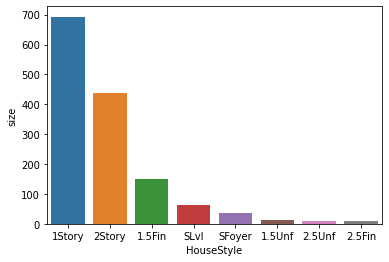

In [133]:
sns.barplot(x=HS['HouseStyle'], y=HS['size'])

# 2. Distribution of one continuous feature

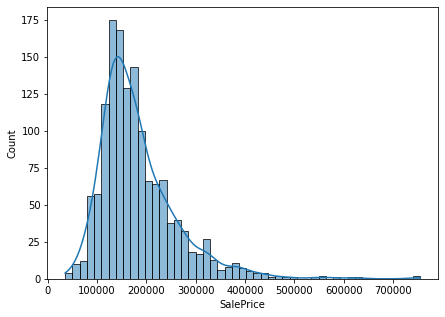

In [154]:
plt.figure(figsize=(7,5))
sns.histplot(x='SalePrice', data=dfn, kde=True)
plt.show()

# 3. Categorical-continuous
(categorical-numerical)

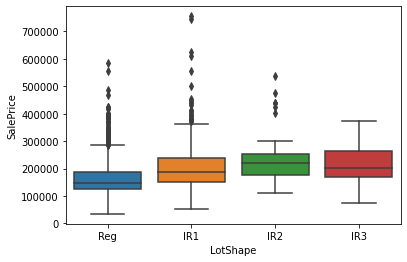

In [155]:
sns.boxplot(x=dfn['LotShape']
            ,y=dfn['SalePrice'])

In [156]:
def check_outlier(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    return ['outlier' if (x<q1-1.5*iqr or x>q3+1.5*iqr) 
                                 else 'not-outlier' for x in data[column].values]

In [158]:
dfn['outlier_SalePrice']=check_outlier(data=dfn,column='SalePrice')

In [159]:
dfn[dfn['outlier_SalePrice']=='outlier']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,totalnull,outlier_SalePrice
11,12,60,RL,85.0,11924,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,7,2006,New,Partial,345000,NaN,outlier
51,54,20,RL,68.0,50271,Pave,IR1,Low,AllPub,Inside,...,0,0,0,11,2006,WD,Normal,385000,NaN,outlier
56,59,60,RL,66.0,13682,Pave,IR2,HLS,AllPub,CulDSac,...,0,0,0,10,2006,New,Partial,438780,NaN,outlier
108,113,60,RL,77.0,9965,Pave,Reg,Lvl,AllPub,Inside,...,168,0,0,10,2007,New,Partial,383970,NaN,outlier
147,152,20,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,1,2008,New,Partial,372402,NaN,outlier
156,162,60,RL,110.0,13688,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,3,2008,WD,Normal,412500,NaN,outlier
173,179,20,RL,63.0,17423,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,7,2009,New,Partial,501837,NaN,outlier
179,186,75,RM,90.0,22950,Pave,IR2,Lvl,AllPub,Inside,...,410,0,0,6,2006,WD,Normal,475000,NaN,outlier
218,225,20,RL,103.0,13472,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,6,2009,WD,Normal,386250,NaN,outlier
225,232,60,RL,174.0,15138,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,7,2009,WD,Normal,403000,NaN,outlier


# 4. Continuous-continuous
(numerical-numerical)

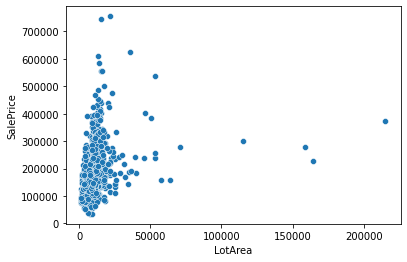

In [177]:
sns.scatterplot(x=dfn['LotArea']
            ,y=dfn['SalePrice'])